In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print("Tensorflow Version:", tf.__version__)

Tensorflow Version: 2.3.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
len(train_images)

60000

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
class_names[3]

'Dress'

In [6]:
train_images.shape

(60000, 28, 28)

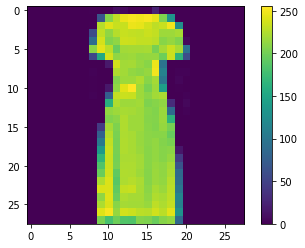

In [7]:
%matplotlib inline
plt.figure()
plt.imshow(train_images[50])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

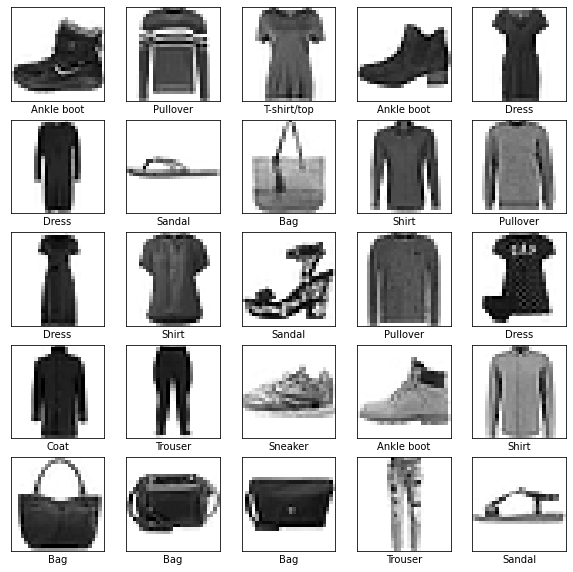

In [9]:
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[5*i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[5*i]])
plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 197s 105ms/step - loss: 0.4930 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 190s 101ms/step - loss: 0.3696 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 212s 113ms/step - loss: 0.3308 - accuracy: 0.8795
Epoch 4/10
1875/1875 [==============================] - 198s 106ms/step - loss: 0.3102 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 202s 108ms/step - loss: 0.2927 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 198s 105ms/step - loss: 0.2774 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 185s 99ms/step - loss: 0.2655 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 181s 97ms/step - loss: 0.2547 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 156s 83ms/step - loss: 0.2467 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==========================

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 13s - loss: 0.3317 - accuracy: 0.8833

Test accuracy: 0.8833000063896179


In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_images)

In [16]:
print(predictions[0])

[3.4018694e-08 5.9529466e-09 1.6905167e-08 9.7936180e-11 1.4363564e-09
 2.4051578e-03 9.6346916e-08 9.3640285e-03 1.2364725e-07 9.8823059e-01]


In [17]:
np.argmax(predictions[0])

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

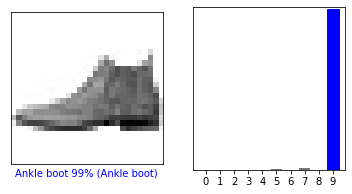

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

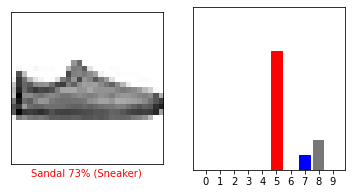

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

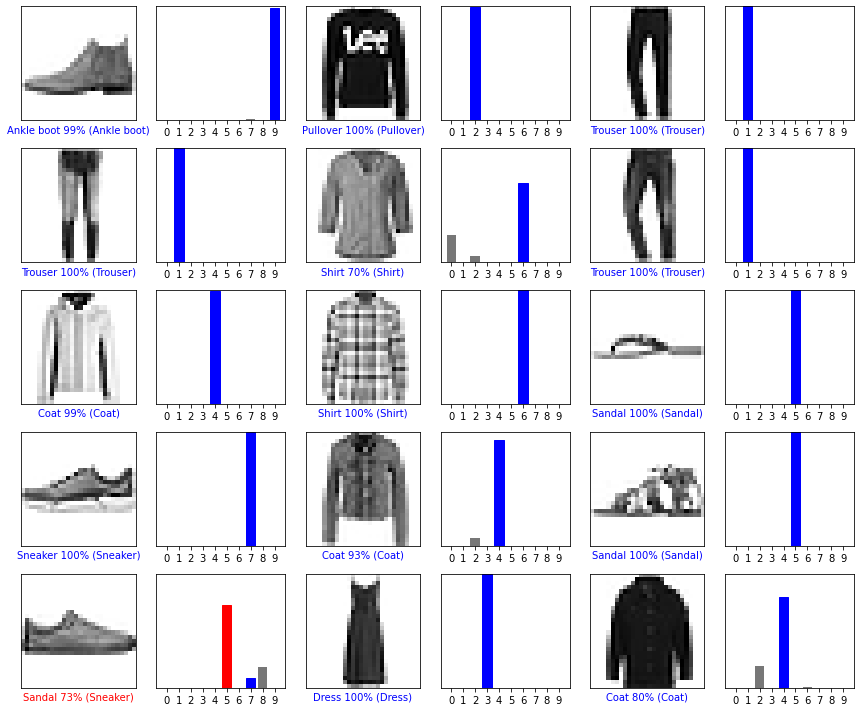

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()